In [0]:
import tensorflow as tf
import numpy as np

In [2]:
tf.__version__

'2.0.0-beta0'

In [0]:
from tensorflow.keras.datasets.cifar10 import load_data

In [0]:
(x_train, y_train), (x_test, y_test) = load_data()
x_train, x_test = x_train/255.0, x_test/255.0


# n_classes = np.max(y_train) + 1
# y_train = np.eye(n_classes)[np.squeeze(y_train)]
# y_test = np.eye(n_classes)[np.squeeze(y_test)]

In [5]:
model = tf.keras.models.Sequential([
    # [32, 32, 3] -> [16, 16, 32]
    tf.keras.layers.Conv2D(32, [3, 3], activation=tf.nn.relu,
                           padding = 'same',
                           kernel_initializer=tf.keras.initializers.he_normal()),
    tf.keras.layers.MaxPooling2D(padding='same'),
    tf.keras.layers.Dropout(0.3),
    
    # [16, 16, 32] -> [8, 8, 64]
    tf.keras.layers.Conv2D(64, [3, 3], activation=tf.nn.relu,
                           padding = 'same',
                           kernel_initializer=tf.keras.initializers.he_normal()),
    tf.keras.layers.MaxPooling2D(padding='same'),
    tf.keras.layers.Dropout(0.3),
    
    # [8, 8, 64] -> [4, 4, 128] -> [?, 4 * 4 * 128]
    tf.keras.layers.Conv2D(128, [3, 3], activation=tf.nn.relu,
                           padding = 'same',
                           kernel_initializer=tf.keras.initializers.he_normal()),
    tf.keras.layers.MaxPooling2D(padding='same'),
    tf.keras.layers.Flatten(input_shape=(4, 4, 128)),
    
    # [?, 4 * 4 * 128] -> [?, 128]
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    # [?, 128] -> [?, 256]
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    
    # [?, 256] -? [?, 10]
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

lr = 1e-3
epsilon = 1e-5
decay = 1e-4

opt = tf.keras.optimizers.RMSprop(lr=lr, epsilon=epsilon, decay=decay)
print("Learning with lr: {}   epsilon: {}   decay: {} for AdamOptimizer".format(lr,
                                                                                epsilon,
                                                                                decay))

model.build([None, 32, 32, 3])
model.summary()

Learning with lr: 0.001   epsilon: 1e-05   decay: 0.0001 for AdamOptimizer
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_______________________________________________

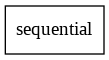

In [8]:
tf.keras.utils.plot_model(model, "Personal Model.png", show_shapes=True)

In [9]:
model.compile(optimizer=opt,
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

print(model.compute_output_shape([None, 32, 32, 3]))

model.fit(x_train,
          y_train,
          shuffle = True,
          validation_split = 0.15,
          batch_size = 128,
          # this is for model.evaluate(x_test, y_test)
          validation_data = (x_test, y_test), 
          epochs=25)

# model.evaluate(x_test, y_test)


(None, 10)


W0613 05:49:55.147104 140522928736128 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 8s 161us/sample - loss: 1.4856 - accuracy: 0.4601 - val_loss: 1.5736 - val_accuracy: 0.4409
Epoch 2/25
50000/50000 [==============================] - 5s 101us/sample - loss: 1.1414 - accuracy: 0.5891 - val_loss: 1.3780 - val_accuracy: 0.5291
Epoch 3/25
50000/50000 [==============================] - 5s 101us/sample - loss: 0.9977 - accuracy: 0.6440 - val_loss: 1.0361 - val_accuracy: 0.6382
Epoch 4/25
50000/50000 [==============================] - 5s 102us/sample - loss: 0.9102 - accuracy: 0.6765 - val_loss: 0.9936 - val_accuracy: 0.6523
Epoch 5/25
50000/50000 [==============================] - 5s 102us/sample - loss: 0.8345 - accuracy: 0.7046 - val_loss: 0.9134 - val_accuracy: 0.6835
Epoch 6/25
50000/50000 [==============================] - 5s 101us/sample - loss: 0.7794 - accuracy: 0.7252 - val_loss: 1.0169 - val_accuracy: 0.6598
Epoch 7/25
50000/50000 [==========================

In [0]:
model2 = tf.keras.models.Sequential([
    # [32, 32, 3] -> [16, 16, 32]
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, kernel_size=5, activation=tf.nn.relu,
                           padding = 'same',
                           kernel_initializer=tf.keras.initializers.he_normal(),
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(padding='same'),
#     tf.keras.layers.Dropout(0.3),
    
    # [16, 16, 32] -> [8, 8, 64]
    tf.keras.layers.Conv2D(64, kernel_size=5, activation=tf.nn.relu,
                           padding = 'same',
                           kernel_initializer=tf.keras.initializers.he_normal(),
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(padding='same'),
    tf.keras.layers.Dropout(0.3),
    
    # [8, 8, 64] -> [4, 4, 128] -> [?, 4 * 4 * 128]
    tf.keras.layers.Conv2D(128, kernel_size=5, activation=tf.nn.relu,
                           padding = 'same',
                           kernel_initializer=tf.keras.initializers.he_normal(),
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(padding='same'),
    tf.keras.layers.GaussianNoise(0.1),
    tf.keras.layers.Flatten(input_shape=(4, 4, 128)),
    
    # [?, 4 * 4 * 128] -> [?, 128]
    tf.keras.layers.Dense(256, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    
    # [?, 128] -> [?, 256]
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    
    # [?, 256] -? [?, 10]
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax, kernel_regularizer=tf.keras.regularizers.l2(0.001))
])


In [13]:
model2.build([None, 32, 32, 3])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch multiple                  12        
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_4 (Conv2D)            multiple                  51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 multiple                  0         
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
conv2d_5 (Conv2D)            multiple                 

In [17]:
lr = 1e-3
epsilon = 1e-6
decay = 1e-4

opt = tf.keras.optimizers.Adam(lr=lr, epsilon=epsilon, decay=decay)


print("Learning with Initial Values")
model2.compile(optimizer=opt,
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

model2.fit(x_train,
          y_train,
          shuffle = True,
          validation_split = 0.1,
          batch_size = 128,
          # this is for model.evaluate(x_test, y_test)
          validation_data = (x_test, y_test), 
          epochs=25)

Learning with Initial Values
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 8s 154us/sample - loss: 1.5556 - accuracy: 0.5842 - val_loss: 1.3315 - val_accuracy: 0.6573
Epoch 2/25
50000/50000 [==============================] - 7s 134us/sample - loss: 1.3330 - accuracy: 0.6543 - val_loss: 1.2326 - val_accuracy: 0.6887
Epoch 3/25
50000/50000 [==============================] - 7s 134us/sample - loss: 1.2176 - accuracy: 0.6953 - val_loss: 1.1474 - val_accuracy: 0.7198
Epoch 4/25
50000/50000 [==============================] - 7s 134us/sample - loss: 1.1492 - accuracy: 0.7212 - val_loss: 1.1063 - val_accuracy: 0.7321
Epoch 5/25
50000/50000 [==============================] - 7s 136us/sample - loss: 1.0761 - accuracy: 0.7454 - val_loss: 1.1292 - val_accuracy: 0.7294
Epoch 6/25
50000/50000 [==============================] - 7s 134us/sample - loss: 1.0453 - accuracy: 0.7572 - val_loss: 1.0519 - val_accuracy: 0.7642
Epoch 7/25
50000/5000